# **EDA(1주차 세션)**

해당 데이터셋 : https://www.kaggle.com/datasets/sakshisatre/tips-dataset

하단 셀을 실행하여 데이터셋을 다운받아주세요.

In [ ]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("tips")
df.to_csv("tips.csv", index=False)

df.head()

# 문제 1) Tips 데이터를 구체적으로 분석하는 문제입니다.


(1) Tips 데이터의 “분석 목적”을 1문장으로 정의하고,

답안 : 고객 특성과 지불 패턴을 파악해 객단가를 높이는 의사결정에 기여하는 것



(2) 독립변수들을 (연속형/범주형) 으로 분류하고, 각 타입에 맞는 EDA 방법(Ex. boxplot, countplot, 히스토그램)을 1개씩 매칭하여 표를 채워주세요.

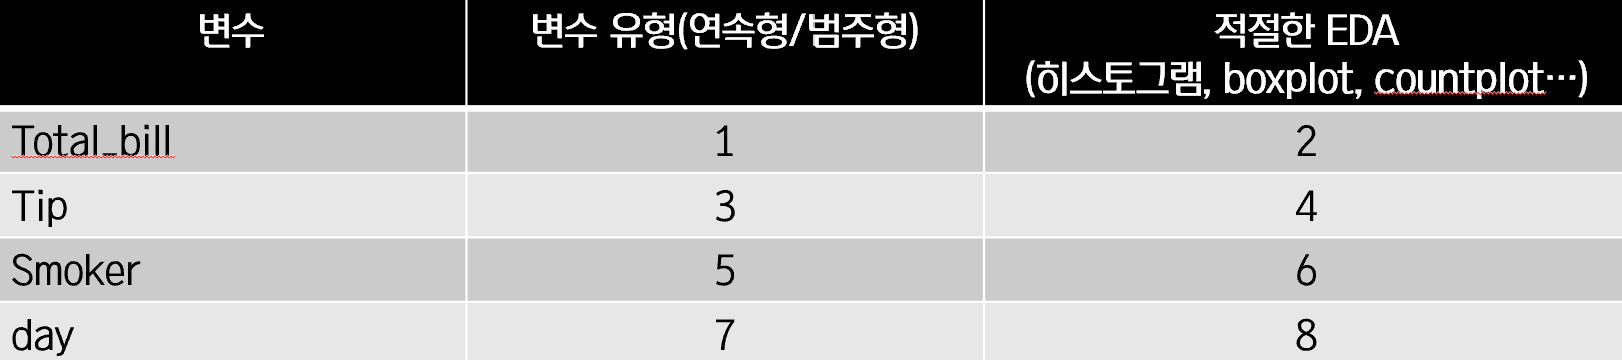


1: 연속형

2: 히스토그램 또는 boxplot

3: 연속형

4: 히스토그램 또는 boxplot

5: 범주형

6: countplot

7: 범주형

8 : countplot

Q1. total_bill 분포가 오른쪽으로 치우치면 분석 또는 모델링에 어떤 문제가 생기는지 간략히 설명하세요.





답안: 극단적으로 큰 값(Outliers)들이 분산을 키워, 데이터의 전반적인 변동성을 해석하는 데 혼란을 주고, 많은 통계적 모델과 알고리즘은 변수가 정규 분포(Normal Distribution)를 따른다고 가정하므로, 치우침이 심하면 잔차(Residuals)의 등분산성이나 정규성 가정이 깨져 모델의 신뢰도가 낮아집니다.

Q2. total_bill과 tip을 산점도로 그렸을 때 양의 관계가 보인다면 이것이 의미하는 바가 무엇인지 쓰세요.

답안: 정비례 관계를 가집니다.

Q3. Boxplot에서 극단적으로 큰 total_bill 값이 관측되었다고 할 때,
아래 중 가장 적절하다고 생각하는 방법 1개를 선택하고 이유를 쓰세요.

① 삭제

② 로그 변환

③ 그대로 둔다

답안 : 로그 변환

이유 : total_bill이 큰 값은 단순한 오류(오타)가 아니라 실제로 비싼 음식을 먹은 손님의 "진짜 데이터"일 확률이 높아 이를 삭제하면 모델이 고액 결제 패턴을 학습할 기회를 잃게 됩니다.

# 문제 2) Tips 데이터셋에 대한 EDA 파이프라인을 완성하세요.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드 (seaborn 내장 데이터셋 사용 시)
df = sns.load_dataset("tips") 

# 1) 구조/요약 확인
df.head()
df.info()
print(df.shape)

# 2) 중복행 확인 및 개수 출력
# duplicated()는 각 행의 중복 여부를 True/False로 반환합니다.
dup_cnt = df.duplicated().sum()
print("duplicates:", dup_cnt)

# 3) 결측치 확인 (변수별 결측 개수)
# isnull()은 결측치인 경우 True를 반환합니다.
miss = df.isnull().sum()
print(miss)

# 4) 연속형 분포 확인: total_bill, tip (히스토그램 2개)
# kde=True를 설정하면 밀도 추정 곡선을 함께 보여줍니다.
sns.histplot(data=df, x="total_bill", kde=True)
plt.show()

sns.histplot(data=df, x="tip", kde=True)
plt.show()

# 5) 범주형 빈도 확인: day, time (countplot 2개)
sns.countplot(data=df, x="day")
plt.show()

sns.countplot(data=df, x="time")
plt.show()

# 6) 범주별 연속형 비교: day별 total_bill / time별 tip (boxplot 2개)
sns.boxplot(data=df, x="day", y="total_bill")
plt.show()

sns.boxplot(data=df, x="time", y="tip")
plt.show()

# 7) 그룹 통계표: day별 total_bill의 평균/중앙값/개수
# sort_values를 통해 평균이 높은 순서대로(내림차순) 정렬합니다.
summary = df.groupby("day")["total_bill"].agg(["mean", "median", "count"]).sort_values(by="mean", ascending=False)
print(summary)

(1) 위 EDA 결과에서 표본이 가장 많은 요일은 무엇인가요?



답안 : 토요일

(2) boxplot을 보고 total_bill이 상대적으로 큰 요일 1개를 고르고 그것이 무엇을 뜻하는지 설명하세요.

답안 : 일요일 
높은 평균 소비 수준: 일요일의 상자(Box) 자체가 다른 요일(특히 목, 금)보다 위쪽에 위치한다는 것은, 일요일에 방문한 손님들의 전반적인 결제 금액 중앙값(median)과 평균이 더 높다는 것을 뜻합니다.
단체 손님 또는 고가 메뉴 선호: total_bill이 크다는 것은 일요일에 방문하는 고객들이 평일보다 더 많은 인원으로 오거나(단체), 단가가 높은 비싼 요리를 주문하는 경향이 있음을 암시합니다.
극단적 고액 결제의 존재 (이상치): 수염(Whisker) 위로 튀어나온 점들은 평소보다 훨씬 많은 금액을 지불한 '헤비 유저'들을 나타냅니다. 일요일 데이터에는 45달러가 넘는 고액 결제 사례들이 포함되어 있어, 주말 특수성이 강하게 나타나는 날임을 알 수 있습니다.

# 문제 3)

(1) 아래 조건에 맞는 코드를 직접 만들어주세요.(자유형)

1. tip_pct 생성

- tip_pct는 계산금액(total_bill) 대비 팁(tip)의 비율로, 손님들의 ‘팁 성향’을 금액 규모와 무관하게 비교하기 위한 지표입니다.

2. 아래 시각화 코드를 각각 작성

- tip_pct 분포

- smoker별 tip_pct boxplot

- time별 tip_pct boxplot

- day별 tip_pct boxplot



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드 (텍스트 파일이 없을 경우 seaborn 내장 데이터 사용 가능)
# df = pd.read_csv("tips.csv")
df = sns.load_dataset("tips")

# 1) tip_pct 만들기 (팁 / 전체 금액)
df["tip_pct"] = df["tip"] / df["total_bill"]

# 2) 시각화 코드 작성

# - tip_pct 히스토그램 분포
sns.histplot(data=df, x="tip_pct", kde=True, color="skyblue")
plt.title("Distribution of Tip Percentage")
plt.show()

# - smoker별 tip_pct boxplot
sns.boxplot(data=df, x="smoker", y="tip_pct", palette="Set2")
plt.title("Tip Percentage by Smoker")
plt.show()

# - time별 tip_pct boxplot
sns.boxplot(data=df, x="time", y="tip_pct", palette="Pastel1")
plt.title("Tip Percentage by Time")
plt.show()

# - day별 tip_pct boxplot
sns.boxplot(data=df, x="day", y="tip_pct", palette="husl")
plt.title("Tip Percentage by Day")
plt.show()

(2) 결론 도출 (서술형)

Q1. 둘 중 적절한 것을 고르세요.

- “EDA 결과, 팁 비율이 상대적으로 높은 그룹은 (Dinner), (Non-Smoker) 이다.”


Q2. 빈칸에 적절한 말을 자유롭게 서술하세요.

“이를 통해 레스토랑 운영자는 객단가가 높고 팁 비율이 안정적인 주말 저녁 시간대에 숙련된 서버를 집중 배치하여 서비스 퀄리티와 수익을 극대화하는 전략을 고려할 수 있다.”
“이를 통해 레스토랑 운영자는 상대적으로 결제 금액이 적은 평일 점심 시간대에 '단체 예약 할인'이나 '런치 스페셜 메뉴'를 도입하여 주중 매출 비중을 높이는 전략을 고려할 수 있다.”
“이를 통해 레스토랑 운영자는 팁에 관대한 비흡연자 및 저녁 고객들을 위한 멤버십 혜택을 강화하거나, 흡연 구역의 서비스를 개선하여 모든 고객군의 만족도를 높이는 전략을 고려할 수 있다.”